In [1]:
import pandas as pd
from pandas import isnull
import numpy as np 
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(os.path.join("googleplaystoremaster.csv"))

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
(data["Rating"]
        .pipe(isnull)
        .value_counts())

False    9367
True     1474
Name: Rating, dtype: int64

In [6]:
# dropping all rows from Rating and Installs which have no value
data = data.dropna(subset=['Rating', 'Installs'])

In [7]:
# Double checking that rows were deleted
(data["Rating"]
        .pipe(isnull)
        .value_counts())

False    9367
Name: Rating, dtype: int64

In [8]:
# Double checking that rows were deleted
(data["Installs"]
        .pipe(isnull)
        .value_counts())

False    9367
Name: Installs, dtype: int64

In [9]:
# Creating a dataframe with the needed variables
df = data.drop(columns=['App', 'Reviews', 'Size',
                        'Type', 'Price', 'Content Rating',
                        'Genres', 'Last Updated',
                        'Current Ver', 'Android Ver'])

In [10]:
df

,Category,Rating,Installs
0,ART_AND_DESIGN,4.1,"10,000+"
1,ART_AND_DESIGN,3.9,"500,000+"
2,ART_AND_DESIGN,4.7,"5,000,000+"
3,ART_AND_DESIGN,4.5,"50,000,000+"
4,ART_AND_DESIGN,4.3,"100,000+"
...,...,...,...
10834,FAMILY,4.0,500+
10836,FAMILY,4.5,"5,000+"
10837,FAMILY,5.0,100+
10839,BOOKS_AND_REFERENCE,4.5,"1,000+"


In [11]:
# Dropping the rows containing these unneeded values
df = df[df.Category != '1.9']
df = df[df.Installs != 'Free']

In [12]:
# I noticed that to use the "Installs" column, I need to delete
# all commas and addition symbols
df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]

In [13]:
# After running this, I noticed the initial 1.9 category, which 
# needs to be dropped
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [14]:
# After running this, I noticed the 'Free' category, which
# needs to be dropped
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [15]:
df.groupby(['Category']).mean()

,Rating,Installs
Category,,
ART_AND_DESIGN,4.358065,2.003760e+06
AUTO_AND_VEHICLES,4.190411,7.278055e+05
BEAUTY,4.278571,6.408619e+05
BOOKS_AND_REFERENCE,4.346067,1.079377e+07
BUSINESS,4.121452,3.306165e+06
COMICS,4.155172,9.661397e+05
COMMUNICATION,4.158537,9.953427e+07
DATING,3.970769,1.355360e+06
EDUCATION,4.389032,5.621626e+06


In [16]:
df

,Category,Rating,Installs
0,ART_AND_DESIGN,4.1,10000
1,ART_AND_DESIGN,3.9,500000
2,ART_AND_DESIGN,4.7,5000000
3,ART_AND_DESIGN,4.5,50000000
4,ART_AND_DESIGN,4.3,100000
...,...,...,...
10834,FAMILY,4.0,500
10836,FAMILY,4.5,5000
10837,FAMILY,5.0,100
10839,BOOKS_AND_REFERENCE,4.5,1000


In [17]:
# Creating a metric for Rating per Install
metric = df['Rating'] / df['Installs']

In [18]:
# declaring the new metric as a column in the dataframe
df['Metric'] = metric

In [19]:
df.sort_values(by=['Metric'])

,Category,Rating,Installs,Metric
3687,VIDEO_PLAYERS,3.7,1000000000,3.700000e-09
3736,NEWS_AND_MAGAZINES,3.9,1000000000,3.900000e-09
9844,NEWS_AND_MAGAZINES,3.9,1000000000,3.900000e-09
3816,NEWS_AND_MAGAZINES,3.9,1000000000,3.900000e-09
3765,NEWS_AND_MAGAZINES,3.9,1000000000,3.900000e-09
...,...,...,...,...
7147,SOCIAL,5.0,5,1.000000e+00
8146,BOOKS_AND_REFERENCE,5.0,5,1.000000e+00
5917,GAME,5.0,1,5.000000e+00
2454,MEDICAL,5.0,1,5.000000e+00


In [20]:
df.groupby(['Category']).mean()

,Rating,Installs,Metric
Category,,,
ART_AND_DESIGN,4.358065,2.003760e+06,0.001175
AUTO_AND_VEHICLES,4.190411,7.278055e+05,0.002305
BEAUTY,4.278571,6.408619e+05,0.002180
BOOKS_AND_REFERENCE,4.346067,1.079377e+07,0.007355
BUSINESS,4.121452,3.306165e+06,0.020448
COMICS,4.155172,9.661397e+05,0.000737
COMMUNICATION,4.158537,9.953427e+07,0.006905
DATING,3.970769,1.355360e+06,0.003520
EDUCATION,4.389032,5.621626e+06,0.000086


In [21]:
# Here I realized there is a need to split the data set by number of installs as variance is to high
# I will try to find the best splitting points

In [22]:
# Testing for a reasonable cutoff for outliers
df.loc[df.Installs >= 500000000, 'Installs'].count()

130

In [23]:
# testing for a reasonable cutoff for outliers
df.loc[df.Installs <= 50, 'Installs'].count()

137

In [24]:
# The median falls at 500,000 installs, so I will try to split the dataset from here.
df.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

## Split the Dataset - Under 100,000 installs and Over 100,000 installs

In [25]:
# Dropping outliers which total 267 rows 
df = df[df.Installs != 1]
df = df[df.Installs != 5]
df = df[df.Installs != 10]
df = df[df.Installs != 50]
df = df[df.Installs != 500000000]
df = df[df.Installs != 1000000000]

In [26]:
# Double checking the values were dropped
df.loc[df.Installs <= 50, 'Installs'].count()

0

In [27]:
# Double checking the values were dropped
df.loc[df.Installs >= 500000000, 'Installs'].count()

0

In [28]:
# Time to create the two data frames - One for over 500,000 installs and one for under 500,000 installs
df1 = df[df['Installs'] >= 500000]
df2 = df[df['Installs'] < 500000]

In [29]:
df1

,Category,Rating,Installs,Metric
1,ART_AND_DESIGN,3.9,500000,7.800000e-06
2,ART_AND_DESIGN,4.7,5000000,9.400000e-07
3,ART_AND_DESIGN,4.5,50000000,9.000000e-08
7,ART_AND_DESIGN,4.1,1000000,4.100000e-06
8,ART_AND_DESIGN,4.4,1000000,4.400000e-06
...,...,...,...,...
10803,GAME,4.3,1000000,4.300000e-06
10809,FAMILY,4.7,1000000,4.700000e-06
10815,BOOKS_AND_REFERENCE,4.2,500000,8.400000e-06
10826,SOCIAL,4.0,5000000,8.000000e-07


In [30]:
df2

,Category,Rating,Installs,Metric
0,ART_AND_DESIGN,4.1,10000,0.000410
4,ART_AND_DESIGN,4.3,100000,0.000043
5,ART_AND_DESIGN,4.4,50000,0.000088
6,ART_AND_DESIGN,3.8,50000,0.000076
9,ART_AND_DESIGN,4.7,10000,0.000470
...,...,...,...,...
10833,BOOKS_AND_REFERENCE,4.8,1000,0.004800
10834,FAMILY,4.0,500,0.008000
10836,FAMILY,4.5,5000,0.000900
10837,FAMILY,5.0,100,0.050000


In [31]:
# Time to normalize the installs column
# Using min-max scaling

df1["Installs"] = (df1["Installs"] - df1["Installs"].min()) / \
                 (df1["Installs"].max() - df1["Installs"].min())

df2["Installs"] = (df2["Installs"] - df2["Installs"].min()) / \
                 (df2["Installs"].max() - df2["Installs"].min())

C:\Users\hdirc_000\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\hdirc_000\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
# Trying to use z-score normalization

#df["Installs"] = (df["Installs"] - df["Installs"].mean()) / \
#                 (df["Installs"].std())

In [33]:
df1.groupby(['Category']).mean()

,Rating,Installs,Metric
Category,,,
ART_AND_DESIGN,4.415789,0.059508,0.000004
AUTO_AND_VEHICLES,4.321739,0.017042,0.000004
BEAUTY,4.250000,0.011307,0.000005
BOOKS_AND_REFERENCE,4.390909,0.114860,0.000003
BUSINESS,4.231193,0.086902,0.000003
COMICS,4.204348,0.018790,0.000004
COMMUNICATION,4.247568,0.274453,0.000002
DATING,4.064286,0.026083,0.000004
EDUCATION,4.430328,0.066562,0.000003


In [34]:
df2.groupby(['Category']).mean()

,Rating,Installs,Metric
Category,,,
ART_AND_DESIGN,4.332558,0.518844,0.001692
AUTO_AND_VEHICLES,4.130000,0.525485,0.003363
BEAUTY,4.296154,0.351736,0.003518
BOOKS_AND_REFERENCE,4.302041,0.284141,0.002132
BUSINESS,4.034426,0.259801,0.007395
COMICS,4.122857,0.438324,0.001218
COMMUNICATION,3.932353,0.268033,0.006712
DATING,3.926364,0.389853,0.005327
EDUCATION,4.236364,0.712440,0.000394


## Time to clean data more, additionally split the groups

In [35]:
group1 = df1.groupby('Category')['Metric']

In [36]:
group2 = df2.groupby('Category')['Metric']

In [37]:
group1 = df1.drop(columns=['Rating', 'Installs'])
group2 = df2.drop(columns=['Rating', 'Installs'])

In [38]:
group1

,Category,Metric
1,ART_AND_DESIGN,7.800000e-06
2,ART_AND_DESIGN,9.400000e-07
3,ART_AND_DESIGN,9.000000e-08
7,ART_AND_DESIGN,4.100000e-06
8,ART_AND_DESIGN,4.400000e-06
...,...,...
10803,GAME,4.300000e-06
10809,FAMILY,4.700000e-06
10815,BOOKS_AND_REFERENCE,8.400000e-06
10826,SOCIAL,8.000000e-07


In [39]:
group2

,Category,Metric
0,ART_AND_DESIGN,0.000410
4,ART_AND_DESIGN,0.000043
5,ART_AND_DESIGN,0.000088
6,ART_AND_DESIGN,0.000076
9,ART_AND_DESIGN,0.000470
...,...,...
10833,BOOKS_AND_REFERENCE,0.004800
10834,FAMILY,0.008000
10836,FAMILY,0.000900
10837,FAMILY,0.050000


In [40]:
group1['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

## Creating variables for each unique category, for both groups

In [41]:
art1 = group1.loc[group1['Category'] == 'ART_AND_DESIGN']
art1 = art1.drop(columns=['Category'])

auto1 = group1.loc[group1['Category'] == 'AUTO_AND_VEHICLES']
auto1 = auto1.drop(columns=['Category'])

beauty1 = group1.loc[group1['Category'] == 'BEAUTY']
beauty1 = beauty1.drop(columns=['Category'])

books1 = group1.loc[group1['Category'] == 'BOOKS_AND_REFERENCE']
books1 = books1.drop(columns=['Category'])


business1 = group1.loc[group1['Category'] == 'BUSINESS']
business1 = business1.drop(columns=['Category'])

comics1 = group1.loc[group1['Category'] == 'COMICS']
comics1 = comics1.drop(columns=['Category'])

comm1 = group1.loc[group1['Category'] == 'COMMUNICATION']
comm1 = comm1.drop(columns=['Category'])

dating1 = group1.loc[group1['Category'] == 'DATING']
dating1 = dating1.drop(columns=['Category'])

education1 = group1.loc[group1['Category'] == 'EDUCATION']
education1 = education1.drop(columns=['Category'])

ent1 = group1.loc[group1['Category'] == 'ENTERTAINMENT']
ent1 = ent1.drop(columns=['Category'])

event1 = group1.loc[group1['Category'] == 'EVENTS']
event1 = event1.drop(columns=['Category'])

finance1 = group1.loc[group1['Category'] == 'FINANCE']
finance1 = finance1.drop(columns=['Category'])

food1 = group1.loc[group1['Category'] == 'FOOD_AND_DRINK']
food1 = food1.drop(columns=['Category'])

health1 = group1.loc[group1['Category'] == 'HEALTH_AND_FITNESS']
health1 = health1.drop(columns=['Category'])

house1 = group1.loc[group1['Category'] == 'HOUSE_AND_HOME']
house1 = house1.drop(columns=['Category'])

lib1 = group1.loc[group1['Category'] == 'LIBRARIES_AND_DEMO']
lib1 = lib1.drop(columns=['Category'])

life1 = group1.loc[group1['Category'] == 'LIFESTYLE']
life1 = life1.drop(columns=['Category'])

game1 = group1.loc[group1['Category'] == 'GAME']
game1 = game1.drop(columns=['Category'])

family1 = group1.loc[group1['Category'] == 'FAMILY']
family1 = family1.drop(columns=['Category'])

med1 = group1.loc[group1['Category'] == 'MEDICAL']
med1 = med1.drop(columns=['Category'])

social1 = group1.loc[group1['Category'] == 'SOCIAL']
social1 = social1.drop(columns=['Category'])

shop1 = group1.loc[group1['Category'] == 'SHOPPING']
shop1 = shop1.drop(columns=['Category'])

photo1 = group1.loc[group1['Category'] == 'PHOTOGRAPHY']
photo1 = photo1.drop(columns=['Category'])

sports1 = group1.loc[group1['Category'] == 'SPORTS']
sports1 = sports1.drop(columns=['Category'])

travel1 = group1.loc[group1['Category'] == 'TRAVEL_AND_LOCAL']
travel1 = travel1.drop(columns=['Category'])

tools1 = group1.loc[group1['Category'] == 'TOOLS']
tools1 = tools1.drop(columns=['Category'])

person1 = group1.loc[group1['Category'] == 'PERSONALIZATION']
person1 = person1.drop(columns=['Category'])

parent1 = group1.loc[group1['Category'] == 'PARENTING']
parent1 = parent1.drop(columns=['Category'])

weather1 = group1.loc[group1['Category'] == 'WEATHER']
weather1 = weather1.drop(columns=['Category'])

video1 = group1.loc[group1['Category'] == 'VIDEO_PLAYERS']
video1 = video1.drop(columns=['Category'])

news1 = group1.loc[group1['Category'] == 'NEWS_AND_MAGAZINES']
news1 = news1.drop(columns=['Category'])

maps1 = group1.loc[group1['Category'] == 'MAPS_AND_NAVIGATION']
maps1 = maps1.drop(columns=['Category'])

In [42]:
art2 = group2.loc[group2['Category'] == 'ART_AND_DESIGN']
art2 = art2.drop(columns=['Category'])

auto2 = group2.loc[group2['Category'] == 'AUTO_AND_VEHICLES']
auto2 = auto2.drop(columns=['Category'])

beauty2 = group2.loc[group2['Category'] == 'BEAUTY']
beauty2 = beauty2.drop(columns=['Category'])

books2 = group2.loc[group2['Category'] == 'BOOKS_AND_REFERENCE']
books2 = books2.drop(columns=['Category'])

business2 = group2.loc[group2['Category'] == 'BUSINESS']
business2 = business2.drop(columns=['Category'])

comics2 = group2.loc[group2['Category'] == 'COMICS']
comics2 = comics2.drop(columns=['Category'])

comm2 = group2.loc[group2['Category'] == 'COMMUNICATION']
comm2 = comm2.drop(columns=['Category'])

dating2 = group2.loc[group2['Category'] == 'DATING']
dating2 = dating2.drop(columns=['Category'])

education2 = group2.loc[group2['Category'] == 'EDUCATION']
education2 = education2.drop(columns=['Category'])

ent2 = group2.loc[group2['Category'] == 'ENTERTAINMENT']
ent2 = ent2.drop(columns=['Category'])

event2 = group2.loc[group2['Category'] == 'EVENTS']
event2 = event2.drop(columns=['Category'])

finance2 = group2.loc[group2['Category'] == 'FINANCE']
finance2 = finance2.drop(columns=['Category'])

food2 = group2.loc[group2['Category'] == 'FOOD_AND_DRINK']
food2 = food2.drop(columns=['Category'])

health2 = group2.loc[group2['Category'] == 'HEALTH_AND_FITNESS']
health2 = health2.drop(columns=['Category'])

house2 = group2.loc[group2['Category'] == 'HOUSE_AND_HOME']
house2 = house2.drop(columns=['Category'])

lib2 = group2.loc[group2['Category'] == 'LIBRARIES_AND_DEMO']
lib2 = lib2.drop(columns=['Category'])

life2 = group2.loc[group2['Category'] == 'LIFESTYLE']
life2 = life2.drop(columns=['Category'])

game2 = group2.loc[group2['Category'] == 'GAME']
game2 = game2.drop(columns=['Category'])

family2 = group2.loc[group2['Category'] == 'FAMILY']
family2 = family2.drop(columns=['Category'])

med2 = group2.loc[group2['Category'] == 'MEDICAL']
med2 = med2.drop(columns=['Category'])

social2 = group2.loc[group2['Category'] == 'SOCIAL']
social2 = social2.drop(columns=['Category'])

shop2 = group2.loc[group2['Category'] == 'SHOPPING']
shop2 = shop2.drop(columns=['Category'])

photo2 = group2.loc[group2['Category'] == 'PHOTOGRAPHY']
photo2 = photo2.drop(columns=['Category'])

sports2 = group2.loc[group2['Category'] == 'SPORTS']
sports2 = sports2.drop(columns=['Category'])

travel2 = group2.loc[group2['Category'] == 'TRAVEL_AND_LOCAL']
travel2 = travel2.drop(columns=['Category'])

tools2 = group2.loc[group2['Category'] == 'TOOLS']
tools2 = tools2.drop(columns=['Category'])

person2 = group2.loc[group2['Category'] == 'PERSONALIZATION']
person2 = person2.drop(columns=['Category'])

parent2 = group2.loc[group2['Category'] == 'PARENTING']
parent2 = parent2.drop(columns=['Category'])

weather2 = group2.loc[group2['Category'] == 'WEATHER']
weather2 = weather2.drop(columns=['Category'])

video2 = group2.loc[group2['Category'] == 'VIDEO_PLAYERS']
video2 = video2.drop(columns=['Category'])

news2 = group2.loc[group2['Category'] == 'NEWS_AND_MAGAZINES']
news2 = news2.drop(columns=['Category'])

maps2 = group2.loc[group2['Category'] == 'MAPS_AND_NAVIGATION']
maps2 = maps2.drop(columns=['Category'])

## ANOVA TEST - For both groups

In [43]:
from scipy.stats import f_oneway

In [44]:
# Group 1 - >= 500,000 Installs

f_oneway(art1, auto1, beauty1, books1, business1, comics1, comm1, dating1, education1,
        ent1, event1, finance1, food1, health1, house1, lib1, life1, game1, family1,
        med1, social1, shop1, photo1, sports1, travel1, tools1, person1, parent1,
        weather1, video1, news1, maps1)

F_onewayResult(statistic=array([12.49624951]), pvalue=array([2.67398435e-60]))

In [45]:
# Group 2 - < 500,000 Installs

f_oneway(art2, auto2, beauty2, books2, business2, comics2, comm2, dating2, education2,
        ent2, event2, finance2, food2, health2, house2, lib2, life2, game2, family2,
        med2, social2, shop2, photo2, sports2, travel2, tools2, person2, parent2,
        weather2, video2, news2, maps2)

F_onewayResult(statistic=array([2.82433858]), pvalue=array([3.30747558e-07]))

## Visualizations

In [47]:
import seaborn as sns

### Count's of each Category

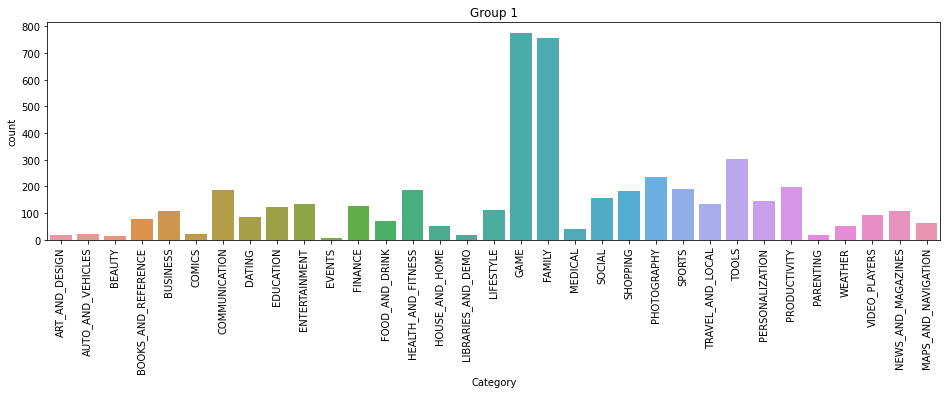

In [48]:
# Group 1 - Count
fig_dims = (16, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="Category", data=group1).set_title('Group 1')
plt.xticks(rotation=90)
plt.show()

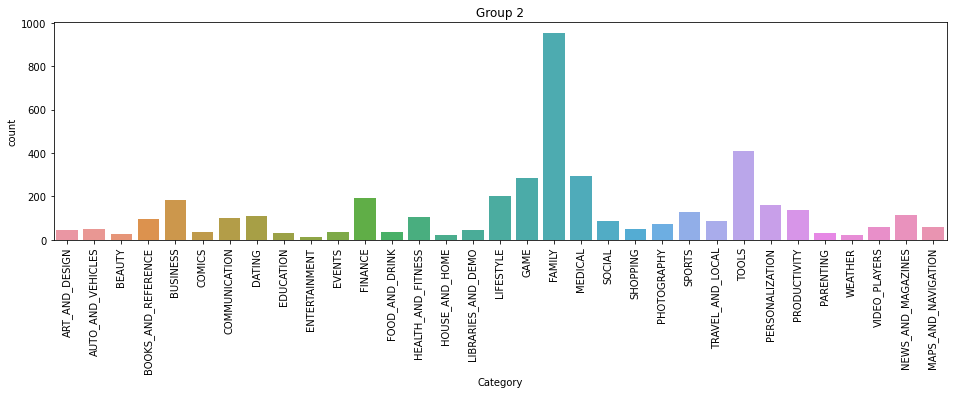

In [49]:
# Group 2 - Count
fig_dims = (16, 4)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="Category", data=group2).set_title('Group 2')
plt.xticks(rotation=90)
plt.show()

### Scatterplot of each categorical variable and its metric

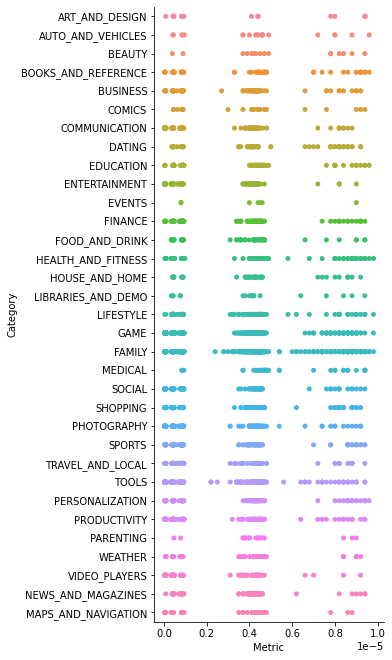

In [50]:
# Group 1 - Scatter
g=sns.catplot(x="Metric", y="Category", jitter=False, data=group1)
g.fig.set_size_inches(6,10)
plt.show()

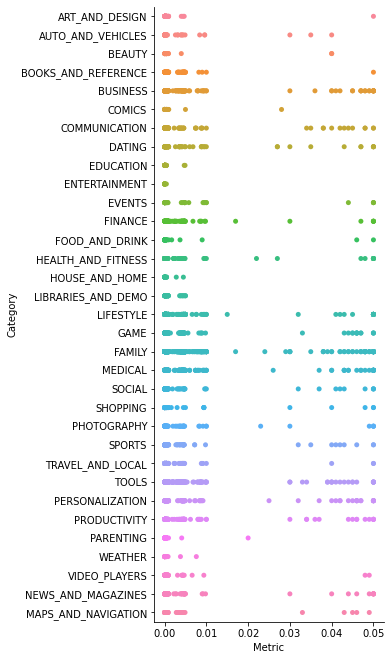

In [51]:
#group 2 - Scatter
g=sns.catplot(x="Metric", y="Category", jitter=False, data=group2)
g.fig.set_size_inches(6,10)
plt.show()

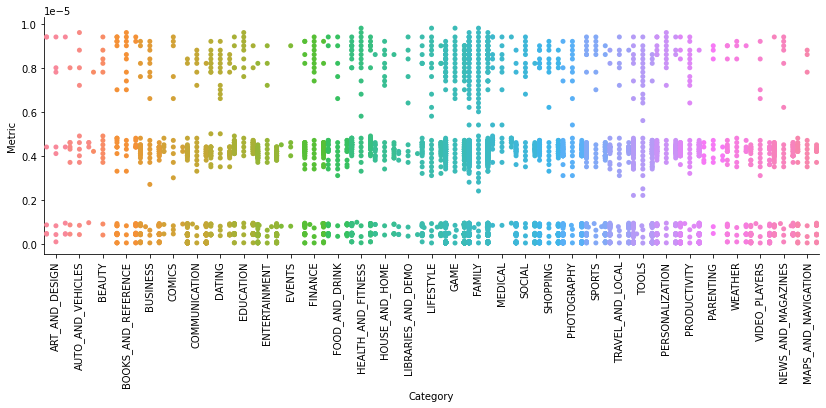

In [52]:
g=sns.catplot(x="Category", y="Metric", kind="swarm", data=group1)
g.fig.set_size_inches(16,4)
plt.xticks(rotation=90)
plt.show()

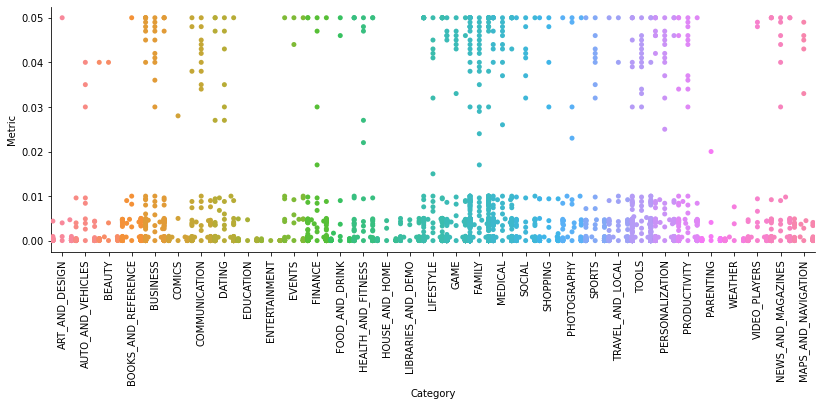

In [53]:
g=sns.catplot(x="Category", y="Metric", kind="swarm", data=group2)
g.fig.set_size_inches(16,4)
plt.xticks(rotation=90)
plt.show()

### Boxplots

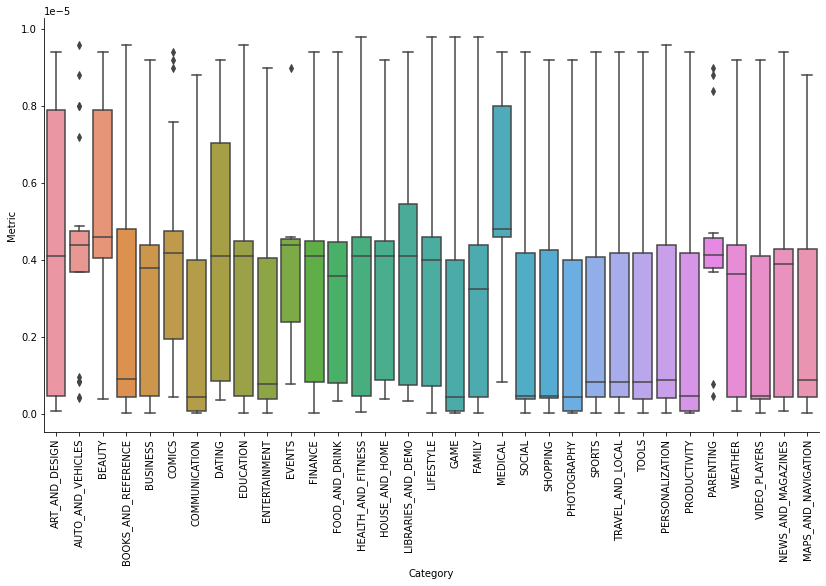

In [54]:
g=sns.catplot(x="Category", y="Metric", kind="box", data=group1)
g.fig.set_size_inches(16,7)
plt.xticks(rotation=90)
plt.show()

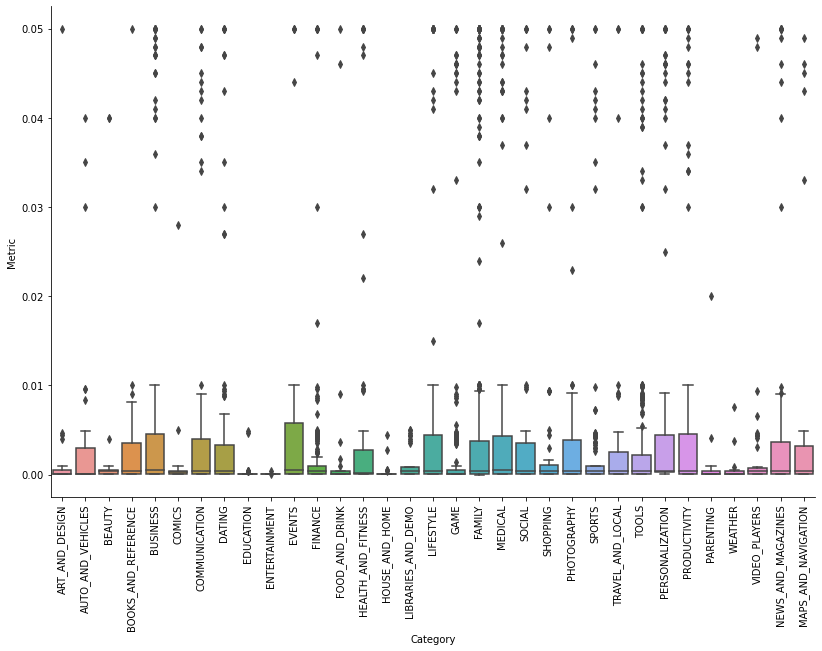

In [55]:
# The reason this graph looks much different than group 1's is the metric values are higher, 
# this is because the Installs column had a lower variance in this group.
# if you look at the above graphs metric you will notice the numbers are le-5, while these are direct.

g=sns.catplot(x="Category", y="Metric", kind="box", data=group2)
g.fig.set_size_inches(16,8)
plt.xticks(rotation=90)
plt.show()

### Barplots

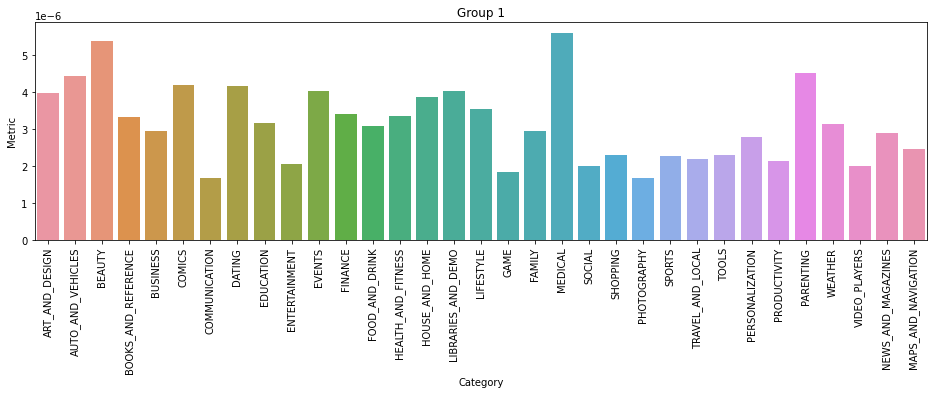

In [56]:
fig_dims = (16, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
sns.barplot(x = "Category", y = "Metric", ax=ax, data=group1, ci=None).set_title('Group 1')
plt.show()

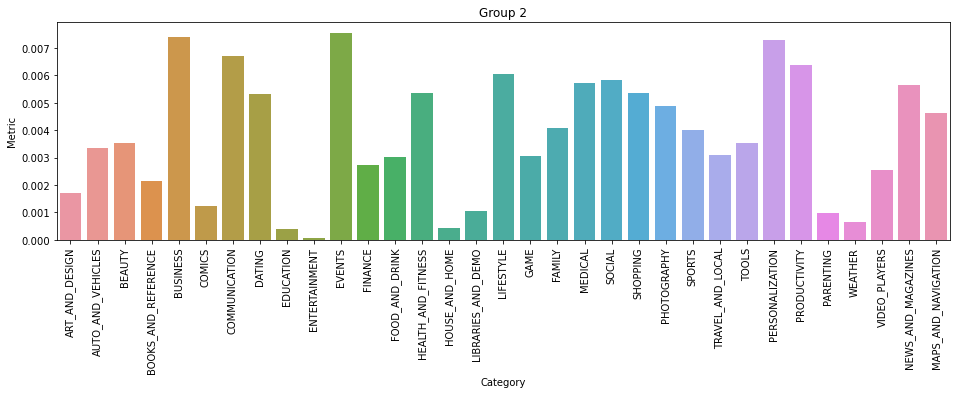

In [57]:
fig_dims = (16, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
sns.barplot(x = "Category", y = "Metric", ax=ax, data=group2, ci=None).set_title('Group 2')
plt.show()

## Grouped Averages of Categories, in descending order

In [58]:
grouped1 = group1.groupby('Category').mean().reset_index()
grouped1.sort_values('Metric', ascending=False)

,Category,Metric
20,MEDICAL,0.000006
2,BEAUTY,0.000005
22,PARENTING,0.000005
1,AUTO_AND_VEHICLES,0.000004
5,COMICS,0.000004
7,DATING,0.000004
17,LIBRARIES_AND_DEMO,0.000004
10,EVENTS,0.000004
0,ART_AND_DESIGN,0.000004
16,HOUSE_AND_HOME,0.000004


In [59]:
grouped2 = group2.groupby('Category').mean().reset_index()
grouped2.sort_values('Metric', ascending=False)

,Category,Metric
10,EVENTS,0.007551
4,BUSINESS,0.007395
23,PERSONALIZATION,0.007297
6,COMMUNICATION,0.006712
25,PRODUCTIVITY,0.006360
18,LIFESTYLE,0.006031
27,SOCIAL,0.005832
20,MEDICAL,0.005706
21,NEWS_AND_MAGAZINES,0.005634
26,SHOPPING,0.005364
